In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

In [2]:
def withStar(string):
  if string=='':
    return '';
  else:
    return '**'+string[:]+'**'

In [3]:
def grams(string,num)->list[str]:
    string=withStar(string)
    begin=len(string)-num;
    token=[];
    for i in range(begin+1):
        a=[];
        a=string[i:i+3]
        token.append(a);
    return token;

In [4]:
def overlap(string1,string2)->int:
    s1=grams(string1,3);
    s2=grams(string2,3);
    common_elements = list(set(s1).intersection(set(s2)));
    lc=len(common_elements);
    m=min(len(s1),len(s2));
    if m==0: 
        return 0;
    else:
        sim1=lc/m;
        return sim1;

In [5]:
def jaccard(string1,string2):
    s1=grams(string1,3);
    s2=grams(string2,3);
    common_elements = list(set(s1).intersection(set(s2)));
    lc=len(common_elements);
    union_elements=list(set(s1).union(set(s2)));
    lu=len(union_elements);
    if lu==0:
        return 0;
    else:
        sim2 = lc/lu;
        return sim2;

In [6]:
def dice(string1,string2):
    s1=grams(string1,3);
    s2=grams(string2,3);
    common_elements = list(set(s1).intersection(set(s2)));
    lc=len(common_elements);
    if len(s1)+len(s2)==0:
        return 0;
    else:
        sim3=2*lc/(len(s1)+len(s2));
        return sim3;

In [7]:
buy_train = pd.read_csv("buy_train.tsv", sep="\t")
buy_train

idx                                          text_left  \
0        0  lg 24 ' lds4821ww semi integrated built in whi...   
1        1  speck seethru clear hard shell case for macboo...   
2        2  denon blu-ray disc dvd/cd player dvd3800bdci 1...   
3        3  panasonic dect 6.0 expandable digital cordless...   
4        4  sony silver minidv handycam camcorder dcrhc52 ...   
...    ...                                                ...   
5738  5738  sony silver cyber-shot digital camera dscw170 ...   
5739  5739  panasonic nnsd377s stainless steel countertop ...   
5740  5740  omnimount 42 ' 63 ' wishbone cantilever extra ...   
5741  5741  samsung black dvd/vhs combo recorder dvdvr375 ...   
5742  5742  logitech mx air rechargeable cordless air mous...   

                                             text_right  label  
0              lg ldf6920bb fully integrated dishwasher      0  
1     speck products seethru case for apple 13 ' mac...      0  
2     denon dvd-2930ci dvd player dvd2930ci dvd + rw...      0  
3     panasonic kx-tg1032s dual handset digital cord...      0  
4        sony minidv head cleaner dvm12cld head cleaner      0  
...                                                 ...    ...  
5738  sony cyber-shot dsc-w300 digital camera 13.6 m...      0  
5739  panasonic nn-c994s genius prestige convection ...      0  
5740  sanus visionmount flat panel tv wall mount mf1...      0  
5741  samsung dvd-v9800 dvd/vcr combo player w / 108...      0  
5742  logitech cordless desktop mx 5000 laser 967562...      0  

[5743 rows x 4 columns]

In [8]:
question1=buy_train['text_left']
question2=buy_train['text_right']
mark=buy_train['label']

In [9]:
# #data processing
# question1_token=[]
# question2_token=[]
# for i in range(len(question1)):
#     question1_token.append(grams(question1[i],3))
# for i in range(len(question2)):
#     question2_token.append(grams(question2[i],3))
question1

0       lg 24 ' lds4821ww semi integrated built in whi...
1       speck seethru clear hard shell case for macboo...
2       denon blu-ray disc dvd/cd player dvd3800bdci 1...
3       panasonic dect 6.0 expandable digital cordless...
4       sony silver minidv handycam camcorder dcrhc52 ...
                              ...                        
5738    sony silver cyber-shot digital camera dscw170 ...
5739    panasonic nnsd377s stainless steel countertop ...
5740    omnimount 42 ' 63 ' wishbone cantilever extra ...
5741    samsung black dvd/vhs combo recorder dvdvr375 ...
5742    logitech mx air rechargeable cordless air mous...
Name: text_left, Length: 5743, dtype: object

In [10]:
question2

0                lg ldf6920bb fully integrated dishwasher
1       speck products seethru case for apple 13 ' mac...
2       denon dvd-2930ci dvd player dvd2930ci dvd + rw...
3       panasonic kx-tg1032s dual handset digital cord...
4          sony minidv head cleaner dvm12cld head cleaner
                              ...                        
5738    sony cyber-shot dsc-w300 digital camera 13.6 m...
5739    panasonic nn-c994s genius prestige convection ...
5740    sanus visionmount flat panel tv wall mount mf1...
5741    samsung dvd-v9800 dvd/vcr combo player w / 108...
5742    logitech cordless desktop mx 5000 laser 967562...
Name: text_right, Length: 5743, dtype: object

In [11]:
#calculate the overlap coefficient
overlap_coefficient=[]
for i in range(len(question1)):
    overlap_coefficient.append(overlap(question1[i],question2[i]))

In [12]:
#get the equal coefficient
equal_overlap=[]
for i in range(len(overlap_coefficient)):
    if mark[i]==1:
        equal_overlap.append(overlap_coefficient[i])
        print("The two sentence is equal, overlap coefficient is:",overlap_coefficient[i])
        print(question1[i])
        print(question2[i])
        print('-'*50)

The two sentence is equal, overlap coefficient is: 0.5476190476190477
whirlpool duet wfw9200sq white front load washer wfw9200swh 4.0 cu . ft. capacity 6th sense technology quiet wash plus noise reduction built-in water heater add-a-garment feature sanitary cycle 4 temperature selections white finish
whirlpool 27 ' duet washer horiz axis wp
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.5454545454545454
nikon black 13.5 megapixel coolpix digital camera coolpixp6000bk 13.5 effective megapixels 4x zoom-nikkor lens 2.7 ' high-resolution wide-viewing angle lcd monitor optical lens shift vr image stabilization wired lan connectivity built-in gps unit wireless remote control in-camera red-eye fix d-lighting black finish
nikon coolpix p6000 13 megapixels digital camera w / 4x wide angle optical zoom , 2.7 ' hi-res lcd , optical vr image stabilization , face priority af & tv movies with sound black 26135
---------------------------------

--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.5531914893617021
hoover u5140-900 bagged tempo widepath upright vacuum u5140 filter traps 100 percent dust mites , 99.98 percent ragweed and common grass pollens powerful 12 amp motor filter bag check for optimum cleaner performance 15 ' cleaner width
hoover company #u5140900 wide path bag up vac
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.49038461538461536
canon vixia high definition camcorder hf10 2.7 ' color widescreen lcd 12x hd video zoom lens 3.3 megapixel digic dv ii image processor 200x digital zoom built in 16 gb memory sd card slot for expanded memory rgb primary color filter built-in electronic lens cover
canon vixia hf10 high definition digital camcorder 2573b001 canon vixia hf10 high definition camcorder
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.76923

The two sentence is equal, overlap coefficient is: 0.4367816091954023
olympus silver digital voice recorder vn4100pc 144 hours 20 minutes recording time pc link file management timer recording four recording modes voice activation silver finish
olympus vn-4100pc 256mb digital voice recorder 141927 256mb flash memory lcd portable
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.5151515151515151
lg 52 ' black lcd flat panel hdtv 52lg70 1920 x 1080p full hd resolution 15,000:1 dynamic contrast ratio trumotion 120hz hdmi v1 .3 with deep color intelligent sensor 24p real cinema clear voice technology invisible speaker system lg simplink black finish
lg lg70 series 52lg70 52 ' lcd tv lg 52lg70 52 ' widescreen 1080p lcd hdtv 120hz 15,000:1 dynamic contrast ratio 4ms response time
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.6041666666666666
sony vertical-in-the-ear stereo headphon

In [13]:
#get the equal coefficient
inequal_overlap=[]
for i in range(len(overlap_coefficient)):
    if mark[i]==0:
        inequal_overlap.append(overlap_coefficient[i])
        print("The two sentence is not equal, overlap coefficient is:",overlap_coefficient[i])
        print(question1[i])
        print(question2[i])
        print('-'*50)

The two sentence is not equal, overlap coefficient is: 0.5476190476190477
lg 24 ' lds4821ww semi integrated built in white dishwasher lds4821wh xl tall tub cleans up to 16 place settings at once adjustable upper rack lodecibel quiet operation senseclean wash system 4 wash cycles with 3 spray arms multi-level water direction slim direct drive motor semi-integrated electronic control panel white finish
lg ldf6920bb fully integrated dishwasher
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.41975308641975306
speck seethru clear hard shell case for macbook air mbaclrsee thin and sleek protective case access to all ports 2-piece snap on clear finish
speck products seethru case for apple 13 ' macbook mb13-pnk-see-v2 plastic pink
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.17903930131004367
denon blu-ray disc dvd/cd player dvd3800bdci 10-bit realta hqv video processor 10

panasonic viera 42 ' plasma flat panel hdtv in black th42px80u 720p display 1024 x 768 native resolution color purity optimizer surround sound anti-reflective filter viera link hdavi control built-in ntsc/atsc/qam tuners 3 hdmi inputs built-in galleryplayer capable sd card memory slot pedestal stand included black finish
panasonic viera tc-26lx85 26 ' lcd tv 26 ' atsc , ntsc 16:9 1366 x 768 hdtv
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5234899328859061
samsung 52 ' series 8 lcd black flat panel hdtv ln52a860 touch of color design full 1080p high definition resolution 50,000:1 dynamic contrast ratio auto motion plus 120hz built-in digital tuner ( atsc/clear qam ) 4ms response time srs trusurround xt down firing speakers slim depth and narrow bezel black with blue finish
samsung 5 series ln37a550 37 ' lcd tv samsung ln37a550 37 ' widescreen 1080p lcd hdtv 15,000:1 dynamic contrast ratio 5ms response time piano black
-----

toshiba 52 ' regza black flat panel lcd hdtv 52rv535u 1080p ( 1920 x 1080 ) full hd cinespeed display srt super resolution technology autoview pixelpure 4g 14-bit internal digital video processor to reach 4,096 levels of gradation dynalight backlight control ntsc/atsc/qam built-in tv tuning double skin thin-line bezel deep color black finish
toshiba 26av502u 26 ' widescreen 720p lcd hdtv piano black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4772727272727273
canon printer black ink cartridge cli221blk fine technology for exceptional sharpness and detail compatible with pixma ip3600 , pixma ip4600 , pixma mp620 and pixma mp980
canon cli-8y ink cartridge 0623b002 yellow
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.15126050420168066
lowepro rezo 15 digital camera case in black rezo15bk slim , sleek little pouch stretchy side gussets pocket for memory card adjusta

samsung 4 series ln22a451 22 ' lcd tv samsung ln22a451 22 ' widescreen lcd hdtv 3,000:1 dynamic contrast ratio 8ms response time white
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2857142857142857
canon black ef 70-300mm f/4 -5.6 is usm telephoto zoom lens 0345b002 15 elements in 10 groups lens construction 4.9 feet closest focusing distance 6-group helical zoom 58mm filter size black finish
canon ef-s 17-85mm f/4 -5.6 is usm standard zoom lens canon 9517a002 ef-s 17-85mm f4-5 .6 is usm standard zoom lens with optical image stabilizer
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4523809523809524
canon pgi-5bk black ink tank cartridge pgi5bk smudge resistant resists smearing caused by highlighters smudge resistant pigment ink formulation for long lasting prints
canon cli-8c ink cartridge 0621b002 cyan
--------------------------------------------------
The two sen

nikon coolpix s550 10 megapixel black digital camera coolpixs550gb 10.0 megapixels 5x optical zoom nikkor glass lens electronic vr image stabilization bright 2.5 ' high resolution lcd in-camera red-eye fix face-priority af d-lighting graphite black finish
panasonic lumix dmc-tz5 digital camera black panasonic lumix dmc-tz5k 9 megapixel digital camera with 28mm wide-angle lens , 10x optical zoom , 3 ' lcd and hd output black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.38461538461538464
sony silver cyber-shot 7.2 megapixel digital camera dscw120 7.2 megapixel 4x optical zoom 2.5 ' tft lcd 15 mb internal memory face detection super steadyshot image stabilization smile shutter mode smart zoom silver finish
sony alpha dslr-a350 digital slr camera dslra350 14.2 megapixel 16:9 2.7 ' active matrix tft color lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4880952380952

panasonic kx-tga630s cordless handset silver pearl wall-mountable
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3763440860215054
canon pixma photo all-in-one printer mp980 high performance wireless printer , copier and scanner easy scroll wheel 3.5 ' high definition lcd display maximum 9600 x 2400 color dpi six individual inks tanks auto duplex print smart copying automatic image optimization no warm-up energy star qualified
canon cl-52 photo ink cartridge for pixma ip6210d and pixma ip6220d printers 0619b002 color
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2571428571428571
linksys simultaneous dual-n band wireless router wrt610n internet-sharing router and 4-port gigabit switch built-in dual-band speed and range enhanced wireless access point two simultaneous , separate radio bands wireless-n technology advanced wireless security and spi firewall
linksys g wir

speck seethru aqua hard shell case for 13 ' macbook mb13aquseev2 translucent hard plastic shell gives great protection full access to all controls rubber feet for added support aqua finish
speck products seethru case for apple 15 ' macbook pro mb15-grn-see-v2 plastic green
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5128205128205128
whirlpool 24 ' built-in dishwasher du1100ss 14-five piece place setting super capacity tub 5 level wash temperature and pressure sensors 4 automatic cycles soak and scour option anyware plus silverware basket hard food disposer with self-cleaning filter quiet partner ii sound package energy star qualified black-on-stainless finish
whirlpool du1055xtss 6 ' console undercounter dishwasher ( stainless steel )
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2966101694915254
sony black 5.1 channel home theater system htddwg700 5.1 channel 9

The two sentence is not equal, overlap coefficient is: 0.1651376146788991
sony soft cyber-shot carrying case lcscst sturdy nylon construction compact and very lightweight stylish black design
sony cyber-shot dsc-w300 digital camera 13.6 megapixel 16:9 3x optical zoom 2x digital zoom 2.7 ' color lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3387096774193548
panasonic viera 42 ' plasma flat panel hdtv in black th42px80u 720p display 1024 x 768 native resolution color purity optimizer surround sound anti-reflective filter viera link hdavi control built-in ntsc/atsc/qam tuners 3 hdmi inputs built-in galleryplayer capable sd card memory slot pedestal stand included black finish
panasonic viera tc-32lz800 32 ' lcd tv 32 ' 16:9 1920 x 1080
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5945945945945946
whirlpool cabrio wtw6400sw top loading white washer wtw6400swh 4.5

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3442622950819672
panasonic expandable digital cordless dect 6.0 phone system kxtg1032s up to 17 hours of talk time expandable up to 6 handsets up to 3-way conference capability light-up indicator with ringer/message alert backlit lcd on handset digital speakerphone 16-minute all-digital answering system silver finish
panasonic kx-ts108w corded phone 1 x phone line ( s ) white
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6346153846153846
sanus 32 ' 84 ' flat panel tv black tilting wall mount vmpl3b virtual axis tilt adjustment system supports up to 280 lbs . fits most large flat panel lcd tvs easy to install black finish
sanus flat panel tv wall mount vm1b aluminum 50 lb
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4406779661016949
lg dle2516w white super c

speck toughskin black case for 4th generation ipod nano nn4tsblk tough custom-fit protective case durable shock-absorbing material detachable rotating belt clip openings to all connections and controls black finish
speck products toughskin for ipod classic ic-blk-ts rubber black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.27941176470588236
canon 2694b001 dvd camcorder dc310 image stabilization widescreen hr recording 2.7 ' lcd screen smooth zoom control built-in lens cover 9 digital effects/9 fades 21 selectable display languages 37x optical/2000x digital zoom silver finish
canon mini dv camcorder starter kit 9582a008 camcorder starter kit
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.6043956043956044
panasonic 2 line 5.8 ghz fhss gigarange expandable digital cordless answering system kxtg6700b expandable up to 8 handsets total 4-line backlit lcd on handset voic

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4864864864864865
samsung 55 ' series 9 lcd black flat panel hdtv ln55a950 touch of color design full 1080p high definition resolution 2,000,000:1 dynamic contrast ratio auto motion plus 120hz built-in digital tuner ( ntsc/atsc/clear qam ) 4ms response time srs trusurround xt down firing speakers picture-in-picture ( pip ) integrated woofer wide color gamut led backlight black finish
samsung ln32a450 32 ' 720p lcd hdtv
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.42857142857142855
nikon coolpix p80 digital camera in black coolpixp80 10.1 megapixels 18x optical wide-angle zoom-nikkor lens 2.7 ' high-resolution lcd electronic viewfinder auto adjusts up to iso 6400 in-camera red-eye fix face-priority af d-lighting high quality tv movies with sound black finish
nikon d300 digital slr camera 25432 12.3 megapixel 3 ' active 

The two sentence is not equal, overlap coefficient is: 0.3448275862068966
canon cyan photo ink cartridge cli8pc compatible with the pixma ip6600d printer
canon pg-40 twin pack black ink cartridge 0615b013 black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.45161290322580644
sony memory stick pro duo adapter for compactflash slot admscf1 for compact flash slots flexibility to use memory stick duo with sony ( alpha ) dslr cameras
sony 16gb memory stick pro duo card ( mark 2 ) msmt16g 16 gb
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.21839080459770116
canon silver powershot digital camera sd880is 10 megapixel 4x optical zoom optical image stabilizer 3.0 ' purecolor lcd ii digic 4 image processor face detection self-timer red-eye correction 19 shooting modes print/share button silver finish
canon eos rebel xsi digital slr camera with ef-s 18-55mm f/3 .5 -5.6 is lens

samsung 32 ' series 6 lcd black flat panel hdtv ln32a650 full 1080p high definition resolution 16:9 widescreen aspect ratio 50,000:1 dynamic contrast ratio srs trusurround xt audio built-in digital tuner ( atsc/clear qam ) picture-in-picture auto volume leveler 4 hdmi slots swivel stand piano black with hint amber finish
samsung 5 series ln37a550 37 ' lcd tv samsung ln37a550 37 ' widescreen 1080p lcd hdtv 15,000:1 dynamic contrast ratio 5ms response time piano black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.30303030303030304
canon blue 8.0 megapixel powershot digital camera sd1100isb 8.0 megapixel 3x optical zoom 2.5 ' color lcd 18 shooting modes red-eye correction face detection technology isaps technology rhythm & blue finish
canon eos 40d digital slr camera 1901b004 canon eos 40d 10 megapixel digital slr camera body only
--------------------------------------------------
The two sentence is not equal, overlap coeffici

The two sentence is not equal, overlap coefficient is: 0.38028169014084506
sony silver cyber-shot digital camera dscw170 10.1 megapixels 2.7 ' lcd display 15 mb internal memory carl zeiss 5x optical zoom lens bionz real imaging processor technology 16:9 high-resolution mode 9-point auto focus automatic macro shooting high sensitivity mode burst mode face detection intelligent scene recognition mode in-camera retouching super steadyshot optical image stabilization with anti-blur solution music slideshow hdtv compatibility beginner-friendly function guide silver finish
sony handycam dcr-hc52 digital camcorder dcrhc52 16:9 2.5 ' color lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5102040816326531
denon black avr-1609 home theater surround sound receiver avr1609 75 watts per channel 7 channels hdmi v1 .3 a video switching dolby digital surround ex , dolby pro logic iix , dts es 6.1 , dts neo :6 decoding audyssey multeq , dyn

logitech blue v470 cordless laser mouse for notebooks 910000298 laser precision side-to-side scrolling plus zoom bluetooth wireless technology protective pouch battery life indicator blue finish
logitech cordless desktop wave 920-000264
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.30120481927710846
sony black dvd recorder and vhs combo player rdrvxd655 multiformat dvd compatible hdmi output and 720p/1080i upscaling hdtv tuner 4 video head stereo vhs with 19 micron heads variable bit rate recording ( 7 speeds ) progressive scan playback dolby digital and dts decoding playback compatible tv virtual surround black finish
sony dvpns57p dvd player dvpns57pb dvd + rw , dvd-rw , dvd + r , dvd-r , cd-rw dvd video , svcd , video cd , jpeg , mp3 playback 1 disc ( s ) progressive scan black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4074074074074074
linksys etherfast10/1

The two sentence is not equal, overlap coefficient is: 0.41379310344827586
linksys wireless-g range expander wre54g supports 64/128-bit wep encryption in 802.11 b/802 .11 g wireless lan configurable through your networked pc?s web browser or the included setup wizard expand your wireless coverage to eliminate dead spots works with both 802.11 b and 802.11 g wireless networks rj-45 10/100 port for easy configuration silver finish
linksys wrt610n simultaneous dual-n band wireless router
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4052631578947368
panasonic silver 8.1 megapixel digital camera dmcfs3s 8.1-megapixel 33mm lens 3x optical zoom intelligent auto mode 2.5 ' diagonal intelligent lcd mega optical image stabilization intelligent iso control face detection hi-speed burst mode silver finish
panasonic lumix dmc-fz28 digital camera black panasonic dmc-fz28k lumix 10 megapixel digital camera with 27mm leica dc vario-elmarit

The two sentence is not equal, overlap coefficient is: 0.2634730538922156
sony 3.1 channel home theater surround system in black htct100 hdmi active intelligence lpcm playback 3.1 channel s-force surround bravia ® sync digital media port black finish eta mid january 2009
sony bravia dav-is50 / b home theater system dvd player , 5.1 speakers 1 disc ( s ) progressive scan 450w rms dolby digital ex , dolby pro logic , dolby pro logic ii
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3055555555555556
sony silver cyber-shot digital camera dscs750 7.2 megapixel super had ccd 2.5 ' lcd display 3x optical zoom high sensitivity mode auto focus 22 mb internal memory face detection burst mode convenient photo modes beginner-friendly function guide silver finish
sony handycam dcr-sr45 digital camcorder dcrsr45 16:9 2.7 ' hybrid lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0

speck seethru black hard shell case for 13 ' macbook mb13blkseev2 translucent hard plastic shell gives great protection full access to all controls rubber feet for added support black finish
speck products seethru case for apple 15 ' macbook pro mb15-blu-see-v2 plastic blue
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.375
escort passport 9500i radar and laser detector 9500i 360-degree radar and laser detection blistering all-band protection gps-powered truelock filter immune to the vg-2 ` detector-detector ' built-in earphone jack red display
cordless solo s2 radar/laser detector 010es20a
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3696969696969697
canon powershot a1000 is gray digital camera a1000isg 10.0 megapixel 4x optical zoom with optical image stabilizer technology 2.5 ' optical viewfinder lcd display digic iii image processor face detection motion detec

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4864864864864865
samsung 40 ' series 7 lcd black flat panel hdtv ln40a750 touch of color design full 1080p high definition resolution 16:9 widescreen aspect ratio 50,000:1 dynamic contrast ratio 4ms response time srs trusurround xt audio built-in digital tuner ( atsc/clear qam ) picture-in-picture 4 hdmi connections ( 3 rear/1 side ) black with red accent finish
samsung ln32a450 32 ' 720p lcd hdtv
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2903225806451613
omnimount wall speaker mount 20wlwh stainless steel shafts and all necessary hardware included supports speakers up to 20 lbs . sold as each white finish ( photo showing black )
omnimount cmk-mini mini wall mounted cable management system
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.40939597315436244
c

cuisinart tob-195 cuisinart exact heat convection toaster oven broiler tob195
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2784090909090909
denon 5 disc cd player dcm390 cd-r/rw playback mp3 , wma and hdcd decoding advanced multilevel noise shaping dac 8 times oversampling digital filter 3 mode random playback intelligent disc scan 20 selection music calendar display black finish
denon dvd-3800bdci blu-ray disc player dvd3800bdci bd-r , dvd-rw , cd-rw , secure digital ( sd ) dvd video , cd-da , mp3 , wma , jpeg , divx 6 , pcm playback progressive scan
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2361111111111111
panasonic pt-ax200u white home theater projector ptax200 2,000-lumen brightness pure color filter dynamic iris smooth screen technology advanced dynamic sharpness control 6,000:1 contrast ratio 1280 x 720 pixels ( 1920 x 1080 pixels with compression ) wh

canon silver 8.0 megapixel powershot digital camera sd1100is 8.0 megapixel 3x optical zoom 2.5 ' color lcd 18 shooting modes red-eye correction face detection technology isaps technology swing silver finish
canon powershot sd880 is digital camera silver 3197b001 canon powershot sd880 is 10 megapixel digital camera w / ua lens , 4x optical zoom , 28mm wide lens , optical image stabilizer , & purecolor ii 3 ' lcd silver
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5172413793103449
sony black hd radio with dock for ipod and iphone xdrs10hdip ipod and iphone dock clear static-free hd digital radio reception fm multicasting no monthly subscription fees backlit lcd display digital tuning clock with alarm time setting wireless remote control stereo speakers with bass reflex sound system black finish
sony ipod/phone dock clock radio black nic icfc1ipmk2whi
--------------------------------------------------
The two sentence is not e

The two sentence is not equal, overlap coefficient is: 0.47058823529411764
denon blu-ray disc dvd/cd player dvd3800bdci 10-bit realta hqv video processor 1080p/24fps output and multi-cadence detection hdmi 1.3 a output with 36-bit deep color support dual 32-bit floating point dsp multi-layered construction with dual-layered top shields and triple-layered bottom suppress vibration hybrid ( s.v.h. ) loader black finish
sony bdp-s550 blu-ray dvd player
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.48677248677248675
canon powershot sx110 is silver digital camera sx110is 9.0 megapixel 10x optical zoom lens with optical image stabilizer technology 3.0 ' lcd display digic iii image processor face detection motion detection 20 shooting modes including 8 special scene modes red-eye correction automatic iso settings print-share button power by aa batteries for convenient silver finish
canon powershot a1000 is digital camera gray 3210b

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4375
sony 40 ' bravia z series black lcd flat panel hdtv kdl40z4100b 1920 x 1080 full hd 1080p resolution digital media extender ( dmex ) bravia engine technology advanced contrast enhancer ( ace ) enhanced ( xmb ) user interface with rich 3d graphics 24p true cinema black finish
sony bravia s series kdl-46s4100 46 ' lcd tv kdl46s4100 46 ' atsc , ntsc 16:9 1920 x 1080 hdtv
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.4305555555555556
netgear prosafe 24-port smart switch gs724tp 24 10/100 / 1000 ports that support 802.3 af poe 2 combo gigabit copper/sfp slots web-based configuration password access control purple finish
netgear prosafe fs116p ethernet switch fs116pna 16 x 10/100base-tx lan
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.40476190476190477
panas

The two sentence is not equal, overlap coefficient is: 0.484375
panasonic 5.8 ghz black expandable digital cordless phone system kxtg4323b include 3 handsets expandable up to 4 handsets digital answering machine system ringer id call waiting caller id voicemail hold mute clock alarm led lighting speakerphone intercom 11 days standby 5 hours talk time black finish
panasonic kx-tg8232b cordless phone 1 x phone line ( s ) black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2
sony black 5.1 channel home theater system htddwg700 5.1 channel 900 watts power portable audio enhancer with front audio input ipod cradle digital cinema auto calibration bravia sync digital media port black finish
sony ht7200dh home theater system dvd player , a/v receiver , 5.1 speakers 1 disc ( s ) progressive scan 1000w rms dolby digital , dolby pro logic , dolby pro logic ii , dts
--------------------------------------------------
The two sentence is 

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.34782608695652173
panasonic white integrated telephone system kxts600w speakerphone one-touch dialer 3-line lcd data port wall mountable white finish
panasonic kx-ts208w corded phone 2 x phone line ( s ) headset white
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.27631578947368424
garmin vehicle suction cup mount 0101093600 no installation required securely mounts your gps to dash black finish
garmin portable friction mount garmin 010-10908-00 portable friction mount
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3684210526315789
sony black 5.1 channel home theater system htddwg700 5.1 channel 900 watts power portable audio enhancer with front audio input ipod cradle digital cinema auto calibration bravia sync digital media port black finish
sony ht-ct100 hom

The two sentence is not equal, overlap coefficient is: 0.391304347826087
sony high definition hdv handycam camcorder hdrhc9 10x optical/20x digital zoom 2.7 ' wide ( 16:9 ) touch panel clear photo lcd plus display switchable hdv/dv format recording active interface shoe built-in intelligent flash progressive shutter system super nightshot infrared system x.v. color technology
sony camcorder case lcsx30 nylon , polyester
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.224
sony dvd remote control for ps2 711719707608 works as a full-featured standard controller performs audio track selection , subtitle display and multiangle options designed to match the sleek look of playstation 2
sony learning remote control rmvl600 tv , dvd player , vcr , cd player , satellite receiver , dvr 32.81 ft universal remote
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.5494505494505495
pa

sony pink cyber-shot 7.2 megapixel digital camera dscw120p 7.2 megapixel 4x optical zoom 2.5 ' tft lcd 15 mb internal memory face detection super steadyshot image stabilization smile shutter mode smart zoom pink finish
canon powershot sd1100 is digital elph camera melody pink 2509b001 canon powershot sd1100 is 8 megapixels , iso 1600 , 3x optical zoom digital camera pink melody
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.23295454545454544
denon black blu-ray disc dvd-cd player dvd1800bd 1080p high resolution via hdmi dolby truehd dolby digital plus dts-hd master audio digital noise reduction remote control black finish
denon dvd-3800bdci blu-ray disc player dvd3800bdci bd-r , dvd-rw , cd-rw , secure digital ( sd ) dvd video , cd-da , mp3 , wma , jpeg , divx 6 , pcm playback progressive scan
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18181818181818182
panasoni

pioneer wired marine remote control display cdmr80d compatible with pioneer headunits satellite radio text indications att ( volume attenuator ) button
pioneer car audio remote control cdvc1 car audio system car audio remote
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2751677852348993
samsung 5 disc home theater surround sound system htz510 5-disc dvd changer hdmi output 5.1 channel home theater audio system multimedia disc playback xm satellite radio-ready wireless ready ipod connectivity compatible black finish
sony bravia dav-hdx279wc home theater system dvd player , 6.1 speakers 5 disc ( s ) progressive scan dolby digital , dts , dolby pro logic ii black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2169811320754717
nikon black 13.5 megapixel coolpix digital camera coolpixp6000bk 13.5 effective megapixels 4x zoom-nikkor lens 2.7 ' high-resolution wide-viewin

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.32432432432432434
sony white cybershot t series digital camera jacket case with stylus lcjthcw for 2007 cybershot t series camera stylus included custom-fitted white finish
sony lcs-twa/b cyber-shot camera case lcstwa/b top loading leather black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.44285714285714284
logitech harmony 890 advanced universal remote control h890 quick and simple set up advanced online setup and update wizard uses both radio frequency ( rf ) and infrared ( ir ) wireless signals integrate up to 15 devices 8 on-screen activity buttons rechargeable lithium ion battery and charging station included fully backlit comfort-grip shape
sony universal remote control rm-ez4 tv , cable box universal remote
--------------------------------------------------
The two sentence is not equal, overlap coefficient is:

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.49411764705882355
sony silver minidv handycam camcorder dcrhc52 680k pixels imager carl zeiss vario-tessar lens 40x optical zoom and 2000x digital zoom 2.5 ' touch panel lcd display super steadyshot image stabilization super nightshot plus technology easy handycam button fader effects manual focus multi-language menu silver finish
sony handycam hdr-hc9 high definition digital camcorder hdrhc9 16:9 2.7 ' color lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.42
sony silver cyber-shot digital camera dscw150 8.1 megapixels 2.7 ' lcd display 15 mb internal memory carl zeiss 5x optical zoom lens 16:9 high-resolution mode 9-point auto focus automatic macro shooting high sensitivity mode burst mode face detection intelligent scene recognition mode in-camera retouching super steadyshot optical image stabilization with anti-bl

sony str-dg920 a/v receiver strdg920 dolby digital , dolby pro logic ii , dts 96/24 , dts neo :6 , dolby digital ex , dolby pro logic iix , dolby pro logic , dts-es , digital cinema sound , dtsfm , am , xm
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.45
canon battery charger 0763b001 compatible with canon nb-2l and nb-2lh batteries
canon battery and charger kit 1169b001 power accessory kit
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.256198347107438
garmin nuvi 255w gps navigation system 0100071820 3d map view auto re-route route avoidance custom pois where am i feature configurable vehicle icons voice prompts choice of route set up touchscreen garmin lock
garmin nvi 205 automobile navigator 010-00717-40 garmin nuvi 205 automobile navigator 3.5 ' active matrix tft color lcd
--------------------------------------------------
The two sentence is not equal, overlap

omnimount 42 ' 63 ' wishbone cantilever extra large flat panel tv silver wall mount uclxb double stud mounting dual arm cantilever mount lift n lock for easy installation integrated cable management supports up to 200 lbs
sanus visionmount flat panel tv wall mount mf110-b1 steel , aluminum 100 lb
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.578125
samsung black dvd/vhs combo recorder dvdvr375 1080p up-conversion via hdmi progressive scan digital-to-analog converter records both dvd discs and vhs tapes no tuner / black finish
samsung dvd-v9800 dvd/vcr combo player w / 1080p up-conversion
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3125
logitech mx air rechargeable cordless air mouse 931633 laser-precise tracking and instant response freespace motion sensing scroll panel easy control of pc-based entertainment gesture controls li-ion battery 2.4 ghz wireless black

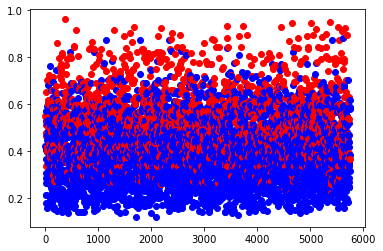

In [14]:
for i in range(len(overlap_coefficient)):
    if overlap_coefficient[i] in equal_overlap:
        plt.scatter(i,overlap_coefficient[i],color='r')
    else:
        plt.scatter(i,overlap_coefficient[i],color='b')
##thershold 0.5

In [15]:
# x=np.linspace(0,1,len(inequal_overlap))
# plt.plot(x,inequal_overlap)

In [16]:
#calculate the jaccard coefficient
jaccard_coefficient=[]
for i in range(len(question1)):
    jaccard_coefficient.append(jaccard(question1[i],question2[i]))

In [17]:
#get the equal coefficient
equal_jaccard=[]
for i in range(len(jaccard_coefficient)):
    if mark[i]==1:
        equal_jaccard.append(jaccard_coefficient[i])
        print("The two sentence is equal, overlap coefficient is:",jaccard_coefficient[i])
        print(question1[i])
        print(question2[i])
        print('-'*50)

The two sentence is equal, overlap coefficient is: 0.10697674418604651
whirlpool duet wfw9200sq white front load washer wfw9200swh 4.0 cu . ft. capacity 6th sense technology quiet wash plus noise reduction built-in water heater add-a-garment feature sanitary cycle 4 temperature selections white finish
whirlpool 27 ' duet washer horiz axis wp
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.3119266055045872
nikon black 13.5 megapixel coolpix digital camera coolpixp6000bk 13.5 effective megapixels 4x zoom-nikkor lens 2.7 ' high-resolution wide-viewing angle lcd monitor optical lens shift vr image stabilization wired lan connectivity built-in gps unit wireless remote control in-camera red-eye fix d-lighting black finish
nikon coolpix p6000 13 megapixels digital camera w / 4x wide angle optical zoom , 2.7 ' hi-res lcd , optical vr image stabilization , face priority af & tv movies with sound black 26135
--------------------------------

lacie 2tb ethernet big disk external hard drive 301239u share files over gigabit ethernet 7200 rotational speed ( rpm ) 16mb cache 400mhz processor smart fan hi-speed usb 2.0 full support for windows , mac and linux
lacie big disk ethernet network storage server 301239u lacie ethernet big disk 2tb usb 2.0 16mb 7200rpm network attached storage
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.24705882352941178
omnimount wall speaker mount 20wlwh stainless steel shafts and all necessary hardware included supports speakers up to 20 lbs . sold as each white finish ( photo showing black )
omnimount stainless steel speaker mount 20.0 wall-w stainless steel 20 lb
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.2550335570469799
canon eos rebel xsi silver digital slr camera xsireb1855s 12.2 megapixel digic iii image processor extensive noise reduction technology auto optimization 3.0 ' 

The two sentence is equal, overlap coefficient is: 0.25177304964539005
samsung 50 ' black flat panel series 4 plasma hdtv pn50a450 1366 x 768 true 720p resolution 1,000,000:1 dynamic contrast ratio filterbright anti-glare and anti burn-in technology built-in hdtv tuner ( atsc/ntsc ) with clear qam srs trusurround xt 3d hd ready swivel stand black finish
samsung pn50a450 50 ' plasma tv samsung pn50a450 50 ' widescreen 720p plasma hdtv 1,000,000:1 dynamic contrast ratio piano black
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.12297734627831715
escort passport 9500ix radar detector 9500ix pre-loaded with thousands of saftey camera locations 360 degree radar & laser protection completely undetectable to all detector scanners variable-speed radar performance gps-powered truelock filter autolearn feature speed alert crystal-clear voice alerts 80 led matrix blue display 5 levels of brightness control black finish
escort passport 9500i

In [18]:
#get the inequal coefficient
inequal_jaccard=[]
for i in range(len(jaccard_coefficient)):
    if mark[i]==0:
        inequal_jaccard.append(jaccard_coefficient[i])
        print("The two sentence is not equal, overlap coefficient is:",jaccard_coefficient[i])
        print(question1[i])
        print(question2[i])
        print('-'*50)

The two sentence is not equal, overlap coefficient is: 0.08041958041958042
lg 24 ' lds4821ww semi integrated built in white dishwasher lds4821wh xl tall tub cleans up to 16 place settings at once adjustable upper rack lodecibel quiet operation senseclean wash system 4 wash cycles with 3 spray arms multi-level water direction slim direct drive motor semi-integrated electronic control panel white finish
lg ldf6920bb fully integrated dishwasher
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.19318181818181818
speck seethru clear hard shell case for macbook air mbaclrsee thin and sleek protective case access to all ports 2-piece snap on clear finish
speck products seethru case for apple 13 ' macbook mb13-pnk-see-v2 plastic pink
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.10649350649350649
denon blu-ray disc dvd/cd player dvd3800bdci 10-bit realta hqv video processor 1

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18446601941747573
nikon coolpix s610 10 megapixel black digital camera coolpixs610bk 10.0 megapixels 4x zoom-nikkor lens 3.0 ' high-resolution wide-viewing angle lcd monitor scene auto selector active child mode smile and food mode face-priority af in-camera red-eye fix d-lighting midnight black finish
nikon coolpix s210 digital camera plum 26103 nikon coolpix s210 8 megapixel digital camera with 3x optical zoom-nikkor , iso2000 , 2.5 ' lcd & vr image stabilization plum
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.09328358208955224
toshiba 22 ' lcd hdtv with built in dvd player in black 22lv505 built-in slot loading dvd player built-in atsc/ntsc/qam digital tuning official divx ® certified pc input space saving design bottom mount stereo speakers black finish
toshiba xd-e500 upconversion dvd player dvd-rw , cd-rw dvd 

The two sentence is not equal, overlap coefficient is: 0.1746987951807229
garmin 010-10723-03 nuvi suction cup mount 0101072303 replacement suction cup mount compatible with garmin nuvi 300/310/350 / 360 gps system black finish
garmin suction cup mount/12-volt adapter kit 010-10979-00 navigator starter kit
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.08333333333333333
lowepro edit 100 digital camera case in black edit100bk designed for digital cameras includes lots of accessory pockets soft , lining , padded interior adjustable divider water-resistant nylon and microfiber
nikon coolpix s550 digital camera cool blue 26109 10 megapixel 16:9 4x digital zoom 2.5 ' active matrix tft color lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.0626865671641791
apple 16gb green 4th generation ipod nano mb913lla holds up to 4,000 songs in 128-kbps aac format , 14,000 ipod-vie

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.11564625850340136
sony 52 ' bravia w-series black lcd flat panel hdtv kdl52w4100 1920 x 1080 full hd resolution dmex motionflow 120hz technology advanced contrast enhancer ( ace ) bravia sync technology 24p true cinema 30,000:1 dynamic contrast ratio 3d comb filter cinemotion reverse 3:2 pulldown technology black finish
sony bravia kdl32xbr6 32 ' lcd tv 32 ' atsc , ntsc 16:9 1920 x 1080 dolby , surround hdtv
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.20218579234972678
lg 5.6 cu . ft. black freestanding electric range lre30453bk intuitouch control system evenjet convection system 5.6 cubic capacity wideview oven window 5 radiant elements 25 heating settings black finish
lg 5.6 cu.ft . freestanding electric range
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 

The two sentence is not equal, overlap coefficient is: 0.12429378531073447
canon printer black ink cartridge cli221blk fine technology for exceptional sharpness and detail compatible with pixma ip3600 , pixma ip4600 , pixma mp620 and pixma mp980
canon cli-8pm photo magenta ink cartridge 0625b002 photo magenta
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.06756756756756757
sony high definition dvd handycam camcorder hdrux10 1920 x 1080 full hd resolution recording face detection 2.3 megapixel clearvid cmos sensor 15x optical/180x digital zoom 2.7 ' wide1 ( 16:9 ) hybrid touch panel clear photo lcd plus display hybrid recording to dvd or memory stick media built-in zoom microphone with 5.1 ch recording dynamic range optimizer super nightshot plus infrared system x.v. color technology
canon vixia hg21 high definition camcorder 2704b001aa
--------------------------------------------------
The two sentence is not equal, overlap c

apple ipod nano armband mb769g/a grey
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.11869436201780416
onkyo 7.1-channel home theater black receiver txsr606b 90 watts per channel power amplifier hdmi 1080i upscaling powered by faroudja dcdi edge truehd and dts-hd decoding hdmi v1 .3 a repeater optimum gain volume audyssey dynamic eq analog to hdmi upconversion music optimizer av sync black finish
onkyo tx-sr876 a/v receiver txsr876b dolby digital , dolby truehd , dts-hd , dolby digital ex , dolby digital plus , dolby pro logic ii , dolby truehd , dts , dts-es , dts neo :6 , thx surround ex , thx select 2fm , am
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.06451612903225806
nikon d300 digital slr digital camera d300body 12.3 megapixel dx-format cmos sensor 3 ' super density 920,000-dot vga color monitor continuous shooting up to 6 frames per second fast accurate 51

The two sentence is not equal, overlap coefficient is: 0.17682926829268292
nikon coolpix p80 digital camera in black coolpixp80 10.1 megapixels 18x optical wide-angle zoom-nikkor lens 2.7 ' high-resolution lcd electronic viewfinder auto adjusts up to iso 6400 in-camera red-eye fix face-priority af d-lighting high quality tv movies with sound black finish
samsung l200 digital camera black ec-l200zbba / us samsung l200 10 megapixel digital camera with 2.5 lcd , 3x optical zoom , digital image stabilization , face detection function black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.13924050632911392
sony ms-a1gd 1gb memory stick micro ( m2 ) msa1gd 1gb storage capacity with 900mb available minimum write speeds of 15 mbps on memory stick micro enabled devices
sony 2gb memory stick pro duo card msmt2g 2 gb
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.233480176211453

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.25517241379310346
canon yellow ink cartridge cli8y compatible with the pixma ip4200 , ip5200 , ip5200r , ip6600d , mp500 , mp800 printers
canon cl-52 photo ink cartridge for pixma ip6210d and pixma ip6220d printers 0619b002 color
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.11063829787234042
linksys compact wireless-g usb adapter wusb54gc connects your desktop or notebook to a wireless network at up to 54mbps when used with a usb 2.0 port compatible with wireless-b networks ( at 11mbps ) protected by wpa and up to 128-bit data encryption
linksys g wireless-g wet54g wireless bridge 54mbps 1 x 10/100base-tx
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.22258064516129034
samsung 26 ' black flat panel series 4 lcd hdtv ln26a450 5,000:1 dynamic contrast ratio 13

sony cyber-shot black digital camera dsct500b 10.1 megapixels 720p hd video recording 3.5 ' lcd plus touch screen display 4mb internal memory carl zeiss 5x optical zoom lens 16:9 high-resolution mode high sensitivity mode burst mode face detection technology high sensitivity iso 3200 in-camera retouching optical steadyshot image stabilization with double anti-blur solution hdtv compatibility bravia sync phototv hd stamina battery power black finish
panasonic lumix dmc-fz28 digital camera black panasonic dmc-fz28k lumix 10 megapixel digital camera with 27mm leica dc vario-elmarit lens , 18x optical zoom and intelligent auto mode black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.09926470588235294
whirlpool 24 ' built-in dishwasher du1055ss 14-five piece place setting super capacity tub 5 level direct feed sheerclean wash system 4 cycles soak and scour option anyware plus silverware basket quiet partner i sound package energy

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.23306233062330622
canon powershot a1000 is gray digital camera a1000isg 10.0 megapixel 4x optical zoom with optical image stabilizer technology 2.5 ' optical viewfinder lcd display digic iii image processor face detection motion detection 17 shooting modes including 8 special scene modes red-eye correction automatic iso settings print-share button power by aa batteries for convenient gray finish
canon powershot sd880 is digital camera silver 3197b001 canon powershot sd880 is 10 megapixel digital camera w / ua lens , 4x optical zoom , 28mm wide lens , optical image stabilizer , & purecolor ii 3 ' lcd silver
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.06976744186046512
polk audio csi a4 cherry center channel loudspeaker csia4ch 1 ' silk/polymer dome tweeter dual 5-1/4 ' mid/woofers magnetic shielding all-mdf constructi

panasonic dect 6.0 expandable digital cordless phone with all-digital answering system kxtg9343t 3 handsets system up to 6 multi-handset capability digital answering machine system ringer id call waiting caller id voicemail hold voice menu marker message mute clock alarm led lighting night mode call block speakerphone 11 days standby 5 hours talk time black metallic finish
panasonic kx-tg6702b cordless telephone kx-tg6702b panasonic 5.8 ghz 2 line expandable phone with extra handset
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.0851063829787234
canon powershot black 14.7 megapixel digital camera g10 14.7 megapixel 5x optical zoom optical image stabilizer digic 4 image processor face detection self-timer intelligent contrast correction 3.0 ' purecolor lcd print/share button black finish
canon fs10 digital camcorder 2686b001 canon fs10 dual flash memory camcorder
--------------------------------------------------
The two sente

sony 42 ' bravia v series black lcd flat panel hdtv kdl42v4100 1920 x 1080 full hd 1080p resolution digital media extender ( dmex ) bravia engine technology advanced contrast enhancer ( ace ) enhanced ( xmb ) user interface with rich 3d graphics 24p true cinema black finish
sony bravia z series kdl-46z4100 46 ' lcd tv kdl46z4100/b 46 ' atsc , ntsc 16:9 1920 x 1080 dolby hdtv 1080i , 1080p
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.11785714285714285
toshiba black portable dvd player sdp91s 9 ' widescreen tft lcd display up to 5 hour lithium battery life official divx certified switchable audio/video input and output swivel and flip type screen black finish
panasonic dvd-ls83 portable dvd player 8.5 ' lcd dvd + rw , dvd-rw , dvd-ram , dvd + r , dvd-r , cd-rw dvd video , cd-da , mp3 , jpeg , mpeg-4 , divx , wma , video cd , svcd , highmat playback
--------------------------------------------------
The two sentence is not equ

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.21923076923076923
canon pixma photo all-in-one printer mp480 high performance printer , copier and scanner 1.8 ' tft display maximum 2400 x 4800 color dpi smart scanning quick start built-in media card slot energy star qualified
canon pixma mx310 multifunction photo printer 2184b002 canon pixma mx310 office all-in-one printer , scanner , copier and fax with high-speed auto document feeder
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.13274336283185842
panasonic nnsd797s stainless steel countertop microwave oven nnsd797ss 1.6 cu . ft. capacity 1250w output power 10 power levels 5 cooking stages one-touch sensor cooking or heating timer stainless steel finish
panasonic nn-h965wf luxury full-size 2-1/5 - cubic-foot 1250-watt microwave oven - white
--------------------------------------------------
The two sentence is not 

The two sentence is not equal, overlap coefficient is: 0.10847457627118644
sony silver 1080p upscaling dvd player dvpns700hs 1080p upscaling video output through hdmi connection bravia sync high resolution jpeg output precision cinema progressive technology precision drive child lock multi disc resume multi brand tv remote control silver finish
sony dvp-fx820 / r portable dvd player dvpfx820/r 8 ' lcd dvd + rw , dvd-rw , dvd + r , dvd-r , cd-rw dvd video , cd-da , mp3 , jpeg playback 1 disc ( s ) red
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.20987654320987653
panasonic black 8.5 ' portable dvd player dvdls86 8.5 ' free style wide screen lcd display 13 hour battery multi format playback dual headphone jacks divx playback car dc adapter included black finish
panasonic dvd-ls83 portable dvd player 8.5 ' lcd dvd + rw , dvd-rw , dvd-ram , dvd + r , dvd-r , cd-rw dvd video , cd-da , mp3 , jpeg , mpeg-4 , divx , wma , video cd 

The two sentence is not equal, overlap coefficient is: 0.18076923076923077
canon silver powershot digital camera sd880is 10 megapixel 4x optical zoom optical image stabilizer 3.0 ' purecolor lcd ii digic 4 image processor face detection self-timer red-eye correction 19 shooting modes print/share button silver finish
canon eos rebel xsi digital slr camera silver 2757b001 12.2 megapixel 3 ' active matrix tft color lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.12345679012345678
applecare protection plan for ipod touch or ipod classic mb591lla extends your service coverage to up to two years includes both phone and in store techinical support
apple ipod classic 120gb hard drive portable media player mb562ll/a audio player , video player , photo viewer 2.5 ' color lcd 120gb hard drive silver
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1732283464566929
panasonic k

canon eos 40d digital slr camera in black eos40dbody body only 10.1 megapixel cmos sensor digic iii image processor auto pop-up , retractable , built-in flash 3.0 ' tft color liquid-crystal monitor af system with 9 cross-type sensors black finish lens sold separately
canon powershot a1000 is digital camera gray 3210b001 canon powershot a1000 is 10 megapixel digital camera w / 4x optical zoom , 2.5 lcd , optical image stabilizer , & face detection gray
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.15625
sony 32 ' bravia l-series black lcd flat panel hdtv kdl32l4000 1366 x 768 resolution up to 1080/60p input capable via hdmi atsc/ntsc tuner with qam 2,000:1 contrast ratio cinemotion reverse 3:2 pulldown technology 3d digital comb filter vesa hole spacing compatible black finish
sony bravia m series kdl-26m4000 26 ' lcd tv kdl26m4000 26 ' atsc , ntsc 16:9 1366 x 768 hdtv
--------------------------------------------------
The tw

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.09795918367346938
lg stainless steel freestanding electric range lre30453ss 5.6 cu . ft. capacity touch controls evenjet convection system wideview window 5 cooktop elements with warming zone auto recipe conversion self-cleaning gocook smart oven light storage drawer stainless steel finish
lg 5.0 cu.ft . freestanding gas range
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.12017167381974249
transcend 8gb micro secure digital memory card ts8gusdhc6 8gb microsd card with adapter compatible with cell phones and mobile devices with microsd input mechanical write protection switch includes adapter to fit sdcard slot for data transfer sdhc class 6 compliant black finish
transcend 2gb microsd card ts2gusd 2 gb
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1242937853

sony bdp-s550 blu-ray dvd player
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18461538461538463
canon nb-5l lithium battery 1135b001 compatible with canon powershot sd700 and ixus 800 digital cameras
canon battery and charger kit 1169b001 power accessory kit
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.10610932475884244
linksys gigabit 5-port workgroup switch eg005w five 10/100/1000mbps , half/full duplex , switched ports forwards and filters packets at non-blocking , full wire speed all ports have auto speed negotiation and auto mdi/mdi-x crossover detection supports address learning and aging , 802.3 x flow control and head-of-line blocking prevention
linksys etherfast ezxs88w ethernet switch ezxs88w linksys etherfast 8-port 10/100 switch ( new/workgroup )
--------------------------------------------------
The two sentence is not equal, overlap coefficient is:

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.059880239520958084
canon powershot sx110 is black digital camera sx110isb 9.0 megapixel 10x optical zoom lens with optical image stabilizer technology 3.0 ' lcd display digic iii image processor face detection motion detection 20 shooting modes including 8 special scene modes red-eye correction automatic iso settings print-share button power by aa batteries for convenient black finish
canon fs10 digital camcorder 2686b001 canon fs10 dual flash memory camcorder
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.08333333333333333
apple 16gb black 2nd generation ipod touch mb531lla holds up to 3,500 songs in 128-kbps aac format , 20,000 ipod-viewable photos and 20 hours of video wi-fi ( 802.11 b/g ) nike + ipod support built-in maps location-based service 3.5 ' ( diagonal ) widescreen multi-touch display 480x320-pixel resoluti

sony lcs-twa/b black soft leather carrying case lcstwab genuine leather construction compatible with cyber-shot w and t series digital cameras integrated belt loop and magnetic closure black finish
sony lcs-csj soft camera case lcscsj top loading polyamide black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.07538802660753881
sony vaio fw series black notebook computer vgnfw378jb 2.40 ghz intel core 2 duo processor p8600 16.4 ' ( 1920 x 1080 ) xbrite-fullhd widescreen display 320gb serial ata 7200rpm hard drive built-in 1.3 megapixel motion eye camera and microphone 4gb pc2-6400 ( 2gbx2 ) installed memory ( maximum up to 8gb ) 1066mhz front side bus speed 3mb l2 cache blu-ray disc support ( read write 2x max ) genuine microsoft windows vista home premium 64-bit black finish
sony vaio notebook and ac adapter case vgpamc2 vaio neoprene notebook & ac adapter case up to 17 in lcd
--------------------------------------------------

The two sentence is not equal, overlap coefficient is: 0.17751479289940827
canon green photo ink cartridge cli8g fine technology for exceptional sharpness & detail compatible with canon pixma pro9000
canon ink cartridge for pixma ip1600 , ip6210d and ip6220d printers 0617b002 color
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.19101123595505617
speck seethru clear hard shell case for macbook air mbaclrsee thin and sleek protective case access to all ports 2-piece snap on clear finish
speck products seethru case for apple 15 ' macbook pro mb15-grn-see-v2 plastic green
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1509433962264151
griffin itrip fm transmitter 4052trpseb one-touch tuning new smartsound ? technology back-lit display included usb-to-mini-usb cable 10-30 foot operation range no batteries required black finish
griffin itrip autopilot fm transmitter 4046-

The two sentence is not equal, overlap coefficient is: 0.11587982832618025
samsung 5 disc black home theater system htz410t 1000 watts total power usb host play dolby digital , dolby pro logic ii and dts decoders 1080p upconversion divx playback hdmi-cec black finish
bose lifestyle 48 home theater system 43479 dvd player , 5.1 speakers progressive scan white
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.10508474576271186
panasonic dect 6.0 black metallic expandable digital cordless phone system kxtg9332t 2 handsets up to 6 multi-handset capability digital answering machine system ringer id call waiting caller id voicemail hold mute clock alarm led lighting night mode call block speakerphone 11 days standby 5 hours talk time black metallic finish
panasonic kx-tg4500b corded/cordless telephone 4 x phone line ( s ) black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2662192393736018
sony vaio cs series pink notebook computer vgncs180jp 2.26 ghz intel core 2 duo processor p8400 14.1 ' ( 1280 x 800 ) xbrite-eco widescreen display 320gb serial ata 5400rpm hard drive built-in 1.3 megapixel motion eye camera and microphone 4gb pc2-6400 ( 2gbx2 ) installed memory integrated stereo a2dp bluetooth 1066mhz front side bus speed 3mb l2 cache blu-ray drive ( read only ) genuine microsoft windows vista home premium 64-bit pink finish
sony vaio cs180j/q notebook vgncs180j/q sony vaio cs series vgn-cs180j / q 14.1-inch notebook 2.26 ghz intel core 2 duo p8400 processor , 4 gb ram , 320 gb hard drive , blu-ray drive , vista home premium - black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.11255411255411256
sony msa2gd 2gb memory stick micro ( m2 ) msa2gu2 ultra-small size 2gb storage capacity wi

The two sentence is not equal, overlap coefficient is: 0.11173184357541899
canon printer color ink cartridge cl211 fine technology for exceptional sharpness and detail new inks improve coloring , color gamut , and color fastness compatible with pixma mp480
canon cli-8y ink cartridge 0623b002 yellow
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.21182266009852216
speck seethru red hard shell case for 13 ' macbook mb13redseev2 translucent hard plastic shell gives great protection full access to all controls rubber feet for added support red finish
speck products seethru case for apple 15 ' macbook pro mb15-pnk-see-v2 plastic pink
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1
canon black ink cartridge pg50 pigment ink formulation for long lasting prints resists smearing caused by highlighters smudge resistant ink remaining notification technology crisp laser text-qu

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.07391304347826087
panasonic kx-tga820b black dect 6.0 cordless handset kxtga820b compatible with dect kx-tg8231 / 8232 series phone systems dect 6.0 technology answering system with compatible base unit call waiting caller id join in/privacy full color backlit lcd display black finish
panasonic kx-tca86 headset over-the-head
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.15760869565217392
ge 24 ' gsd2400nww white built-in dishwasher gsd2400wh 4-level powerscrub wash system hotstart option piranha hard food disposer heated dry option self-cleaning filter system white finish
frigidaire fdb130rgs 24 ' built-in dishwasher ( white )
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.31601731601731603
canon pink 8.0 megapixel powershot digital camera sd1100isp 8.0 megap

panasonic black expandable digital cordless dect 6.0 phone system kxtg8232b large 1.5 ' color lcd extended talk time reduced interference hearing aid compatibility all-digital answering system 2 handsets piano black finish
panasonic kx-tg1032s dual handset digital cordless phone 1 x phone line ( s ) headset jack silver
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1921182266009852
speck seethru green hard shell case for 15 ' macbook mb15grnseev2 translucent hard plastic shell gives great protection full access to all controls rubber feet for added support green finish
speck products seethru case for apple macbook air mba-clr-see plastic clear
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2097560975609756
speck seethru aqua hard shell case for 13 ' macbook mb13aquseev2 translucent hard plastic shell gives great protection full access to all controls rubber feet for

The two sentence is not equal, overlap coefficient is: 0.09134615384615384
peerless 10 ' 22 ' flat panel tv black pivot wall arm pp730 extends 7.01 ' from the wall retracts to 1.88 ' to save space integrated cable management pre-tensioned tilt mechanism black finish
sanus flat panel tv wall mount vmpl50-b steel 130 lb
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.08780487804878048
transcend 2gb micro sd secure digital memory card ts2gusd good with cell phones and mobile devices mechanical write protection switch uses microsd adapter compliant with secure digital music initiative
sony 1gb memory stick micro ( m2 ) card msa1gd 1 gb
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.22950819672131148
samsung 37 ' series 4 lcd black flat panel hdtv ln37a450 true 720p high definition resolution 16:9 widescreen aspect ratio 10,000:1 dynamic contrast ratio 6ms response time s

linksys wireless-g wusb54gc compact usb adapter
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18587360594795538
canon silver powershot digital camera sd880is 10 megapixel 4x optical zoom optical image stabilizer 3.0 ' purecolor lcd ii digic 4 image processor face detection self-timer red-eye correction 19 shooting modes print/share button silver finish
sony cyber-shot dsc-w170 digital camera silver dscw170 10.1 megapixel 16:9 2x digital zoom 2.7 ' active matrix tft color lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2459016393442623
samsung 52 ' series 8 lcd black flat panel hdtv ln52a850 full 1080p ( 1920x1080 ) resolution touch of color auto motion plus 120hz 50,000:1 dynamic contrast ratio 4ms response time srs trusurround xt built-in digital tuner ( atsc/clear qam ) black with red accent finish
samsung 4 series ln37a450 37 ' lcd tv samsung ln37a450 37 ' wi

The two sentence is not equal, overlap coefficient is: 0.20761245674740483
panasonic black lumix wide angle lens digital camera dmctz5k 9.1 megapixel leica 28mm wide-angle lens with 10x optical zoom 3.0 ' lcd display with intelligent lcd function burst mode scene mode auto angle detection 27mb built-in memory sd memory slot black finish
sony alpha dslr-a300 digital slr camera with 18-70mm zoom lens black dslra300k 10.2 megapixel 3.9 x optical zoom 2.7 ' active matrix tft color lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.22692307692307692
panasonic 5.8 ghz black expandable digital cordless phone kxtg4321b multi-handset capability digital answering machine system ringer id call waiting caller id voicemail hold mute clock alarm led lighting speakerphone intercom 11 days standby 5 hours talk time black finish
panasonic kx-tg4323b 5.8 ghz expandable digital cordless phone 1 x phone line ( s ) black
-------------------------

The two sentence is not equal, overlap coefficient is: 0.11290322580645161
canon pixma multifunction printer mx310 up to 4800 x 1200 color dpi resolution microscopic 2-picoliter sized ink droplets built-in auto-image fix quick start smart copying copies , scans , faxes and prints documents prints photos
canon pg-50 high capacity black ink cartridge for pixma mp450 printer 0616b002 black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.0949367088607595
logitech harmony one advanced universal remote control harmony1 one-touch access to your entertainment replaces up to 15 remotes full-color touch screen sculpted , backlighted buttons in logical zones ergonomic design rechargeable guided online setup world?s largest av control database/915 -000035
sony learning remote control rmvl600 tv , dvd player , vcr , cd player , satellite receiver , dvr 32.81 ft universal remote
--------------------------------------------------
The two sen

canon dc310 digital camcorder 2694b001 canon dc310 dvd camcorder w / 41x advanced zoom , built-in lens cover , image stabilization , & canon exclusive - digic dv ii
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.16772151898734178
sony bravia theater black micro system davis50b 5.1-channel surround sound golf ball-sized speakers compact design s-air digital wireless capability hdmi connectivity bravia sync digital cinema sound ( dcs ) technology s-master digital amplifier portable audio enhancer black finish
sony bravia dav-hdx576wf home theater system dvd player , amplifier , 5.1 speakers 5 disc ( s ) progressive scan 1000w rms dolby pro logic ii
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.06015037593984962
weber 3758301 blue genesis ep-320 lp gas grill 3758301 3 seamless stainless steel burners 42,000 btu-per-hour input crossover ignition system stainless steel 

canon easy photo pack 1335b001 combines ink and paper into one cartridge dye-sublimination technology
canon pixma ip2600 inkjet photo printer 2435b002
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1254355400696864
sony dvp-fx820 black 8 ' portable dvd player dvpfx820 swivel & flip screen with dual sensor for remote control control buttons on screen bezel 12 bit video dac with 108 mhz processing removable , rechargeable battery & car adapter included black finish
sony dvpns57p dvd player dvpns57pb dvd + rw , dvd-rw , dvd + r , dvd-r , cd-rw dvd video , svcd , video cd , jpeg , mp3 playback 1 disc ( s ) progressive scan black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.16756756756756758
sanus 30 ' 50 ' full-motion flat panel tv black wall mount lrf118b1 swivel motion low profile virtual axis technology easy access to wires universal mounting brackets black finish


--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.0982367758186398
garmin nuvi 265wt gps navigation system 0100057510 4.3 ' widescreen sunlight-readable touchscreen display size turn-by-turn directions voice prompts speaks street names 2-d or 3-d maps bluetooth wireless technology avoid traffic tie-ups integrated fm traffic receiver sleek & slim design jpeg picture viewer world travel clock up to 4 hours of battery life garmin lock grey finish
garmin nvi 255w automobile navigator 010-00718-20 garmin nuvi 255w 4.3 ' gps w / text to speech , where am i ?
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.16287878787878787
sony 42 ' bravia v series black lcd flat panel hdtv kdl42v4100 1920 x 1080 full hd 1080p resolution digital media extender ( dmex ) bravia engine technology advanced contrast enhancer ( ace ) enhanced ( xmb ) user interface with rich 3d graphics 24p true ci

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.15217391304347827
canon rechargeable battery 9763a001 compatible with the sd200 , sd300 , sd400 , sd30 , sd450 , sd600 , sd630 , sd750 , sd1000 and other powershot cameras oem litium ion battery 180 minutes of playback time
canon battery and charger kit 1169b001 power accessory kit
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.12033195020746888
linksys wireless-g broadband router wrt54gl all-in-one internet-sharing router 4-port switch push button setup feature tkip and aes encryption wireless mac address filtering powerful spi firewall 54mbps wireless-g ( 802.11 g ) access point
linksys wireless-n wrvs4400n gigabit security router with vpn 4 x lan
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.11515151515151516
samsung 32 ' black flat panel series 4 lcd hdtv

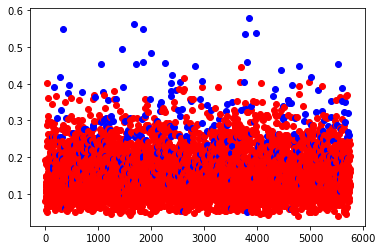

In [19]:
for i in range(len(jaccard_coefficient)):
    if jaccard_coefficient[i] in inequal_jaccard:
        plt.scatter(i,jaccard_coefficient[i],color='r')
    else:
        plt.scatter(i,jaccard_coefficient[i],color='b')
# worse than overlap coeffient

In [20]:
#calculate the dice's coefficient
dice_coefficient=[]
for i in range(len(question1)):
    dice_coefficient.append(dice(question1[i],question2[i]))

In [21]:
#get the equal coefficient
equal_dice=[]
for i in range(len(dice_coefficient)):
    if mark[i]==1:
        equal_dice.append(dice_coefficient[i])
        print("The two sentence is equal, overlap coefficient is:",dice_coefficient[i])
        print(question1[i])
        print(question2[i])
        print('-'*50)

The two sentence is equal, overlap coefficient is: 0.16727272727272727
whirlpool duet wfw9200sq white front load washer wfw9200swh 4.0 cu . ft. capacity 6th sense technology quiet wash plus noise reduction built-in water heater add-a-garment feature sanitary cycle 4 temperature selections white finish
whirlpool 27 ' duet washer horiz axis wp
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.403960396039604
nikon black 13.5 megapixel coolpix digital camera coolpixp6000bk 13.5 effective megapixels 4x zoom-nikkor lens 2.7 ' high-resolution wide-viewing angle lcd monitor optical lens shift vr image stabilization wired lan connectivity built-in gps unit wireless remote control in-camera red-eye fix d-lighting black finish
nikon coolpix p6000 13 megapixels digital camera w / 4x wide angle optical zoom , 2.7 ' hi-res lcd , optical vr image stabilization , face priority af & tv movies with sound black 26135
---------------------------------

The two sentence is equal, overlap coefficient is: 0.2275132275132275
maytag med5900tw white electric dryer med5900twh 7.0 cu . ft. capacity gentlebreeze drying system multiple drying temperatures intellidry sensor 9 drying cycles 7 temperature settings 120-minute wrinkle prevent option 360 degree front and rear heat seal metallic console styling die-cast metallic control knob white finish
7.0 cu . ft. super capacity electric dryer med5900tw
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.2560386473429952
panasonic viera 50 ' plasma flat panel 1080p hdtv in black th50pz85u 1080p display 1920 x 1080 native resolution color purity optimizer surround sound anti-reflective filter viera link hdavi control built-in ntsc/atsc/qam tuners 3 hdmi inputs built-in galleryplayer capable sd card memory slot pedestal stand included black finish
panasonic viera th-50pz85u 50 ' plasma tv 50 ' atsc , ntsc 16:9 1920 x 1080 hdtv
---------------------

--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.18181818181818182
escort passport 9500ix radar detector 9500ix pre-loaded with thousands of saftey camera locations 360 degree radar & laser protection completely undetectable to all detector scanners variable-speed radar performance gps-powered truelock filter autolearn feature speed alert crystal-clear voice alerts 80 led matrix blue display 5 levels of brightness control black finish
escort passport 9500ix radar/laser detector
--------------------------------------------------
The two sentence is equal, overlap coefficient is: 0.34
samsung 42 ' black flat panel series 4 plasma hdtv pn42a450p 1024 x 768p resolution 1,000,000:1 dynamic contrast ratio filterbright anti glare filter dnie technology acesilhouette editor anti burn-in technology 3d technology srs trusurround xt atsc/ntsc/clear qam built-in tuners black finish
samsung pn42a450 42 ' widescreen 720p plasma hdtv 100,000:1 dy

In [22]:
#get the inequal coefficient
inequal_dice=[]
for i in range(len(dice_coefficient)):
    if mark[i]==0:
        inequal_dice.append(dice_coefficient[i])
        print("The two sentence is not equal, overlap coefficient is:",dice_coefficient[i])
        print(question1[i])
        print(question2[i])
        print('-'*50)

The two sentence is not equal, overlap coefficient is: 0.12332439678284182
lg 24 ' lds4821ww semi integrated built in white dishwasher lds4821wh xl tall tub cleans up to 16 place settings at once adjustable upper rack lodecibel quiet operation senseclean wash system 4 wash cycles with 3 spray arms multi-level water direction slim direct drive motor semi-integrated electronic control panel white finish
lg ldf6920bb fully integrated dishwasher
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.30357142857142855
speck seethru clear hard shell case for macbook air mbaclrsee thin and sleek protective case access to all ports 2-piece snap on clear finish
speck products seethru case for apple 13 ' macbook mb13-pnk-see-v2 plastic pink
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1423611111111111
denon blu-ray disc dvd/cd player dvd3800bdci 10-bit realta hqv video processor 10

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.147239263803681
panasonic hands free headset kxtca92 comfort fit with fold design noise cancelling microphone volume control mute standard 2.5 mm connection
panasonic kxth1212b
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.31475409836065577
yamaha ns-aw190bl all-weather speaker system nsaw190bk 5 ' high compliance pp mica filled woofers unique dual 1/2 ' pei dome tweeter configuration aluminum speaker grilles wall mountable black finish sold as a pair
yamaha outdoor ns-aw390 all-weather speaker system ns-aw390bl 2-way speaker cable black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.20044543429844097
canon black 8.0 megapixel powershot digital camera a590is 8.0 megapixels 4x optical zoom optical image stabilizer large bright 2.5 ' lcd 19 shooting modes red-e

The two sentence is not equal, overlap coefficient is: 0.1650485436893204
kenwood 6-disc cd changer kdcc669 3-angle mounting cd , cd-r and cd-rw playback anti-vibration disc transport compatible with all kenwood units with changer control
denon dcm-390 5 disc cd changer dcm390
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.28895184135977336
sony vaio js series black all-in-one desktop computer vgcjs130jb 2.5 ghz intel pentium dual-core processor e5200 20.1 ' ( 1680 x 1050 ) widescreen wsxga + xbrite-hicolor technology display 500gb serial ata 7200rpm hard drive built-in 1.3 megapixel motion eye camera and microphone with face-tracking technology 4gb pc2-6400 ( 2gbx2 ) installed memory 800mhz front side bus speed 2mb l2 cache genuine microsoft windows vista home premium 64-bit black finish
sony vaio rt all-in-one desktop vgcrt150y sony vaio rt150y all in one desktop computer 2.66 ghz intel core 2 quad 9400 processor , 8gb ram 

canon ef-s 17-85mm f/4 -5.6 is usm standard zoom lens canon 9517a002 ef-s 17-85mm f4-5 .6 is usm standard zoom lens with optical image stabilizer
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18009478672985782
canon pgi-5bk black ink tank cartridge pgi5bk smudge resistant resists smearing caused by highlighters smudge resistant pigment ink formulation for long lasting prints
canon cli-8c ink cartridge 0621b002 cyan
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.21561338289962825
peerless flat panel display mount black finish sglb01 can hold between 32 ' to 50 ' screens/vertical screen adjustment feature for optimal viewing height internal cable management adjustable glass shelving black finish
peerless ss550p flat panel tv stand glass black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.26857142857142857


The two sentence is not equal, overlap coefficient is: 0.14395886889460155
sony 8 ' black lcd digital photo frame dpfd80 4:3 widescreen lcd display vga 800 x 600 resolution 256 mb internal memory portrait-landscape auto orientation sensor on-off backlit sony logo clock and calendar mode usb and memory card slots remote control black finish
sony cyber-shot dsc-h50 digital camera black dsch50b 9.1 megapixel 16:9 2x digital zoom 3 ' active matrix tft color lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.12844036697247707
canon silver 10 megapixel powershot digital camera sd890is 10.0 megapixel 5x optical zoom optical image stabilizer 2.5 ' purecolor lcd face detection technology motion detection technology digic iii image processor red-eye correction silver finish
canon fs10 digital camcorder 2686b001 canon fs10 dual flash memory camcorder
--------------------------------------------------
The two sentence is not equal, overl

The two sentence is not equal, overlap coefficient is: 0.23622047244094488
canon black 8.0 megapixel powershot digital camera a590is 8.0 megapixels 4x optical zoom optical image stabilizer large bright 2.5 ' lcd 19 shooting modes red-eye correction isaps technology face detection technology motion detection technology black finish
sony cyber-shot dsc-h10 digital camera black dsch10/b 8.1 megapixel 16:9 2x digital zoom 3 ' active matrix tft color lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.13577023498694518
olympus silver digital voice recorder vn4100pc 144 hours 20 minutes recording time pc link file management timer recording four recording modes voice activation silver finish
sony vrdmc5 digital video recorder dvd + rw , dvd-rw , dvd + r , memory stick , memory stick duo , secure digital ( sd ) card , xd-picture card , compactflash ( cf ) dvd video , mp3 1 disc 12hour recording
---------------------------------------

sony dvp-fx820 portable dvd player dvpfx820 8 ' lcd dvd + rw , dvd-rw , dvd + r , dvd-r , cd-rw dvd video , cd-da , mp3 , jpeg playback 1 disc ( s ) black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.24089635854341737
samsung 50 ' widescreen plasma hdtv pn50a650 touch of color ultra filterbright anti glare technology 1,000,000:1 dynamic contrast ratio picture-in-picture anti-burn-in technology sports/game/movie modes single integrated user interface with wheel-key remote atsc/ntsc/clear qa tuners
samsung hl72a650 72 ' widescreen 1080p dlp hdtv 2,500:1 contrast ratio
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.16736401673640167
sony silver 1080p upscaling 5-disc dvd changer dvpnc800hs 5 disc dvd/cd changer 1080p upscaling video output through hdmi connection bravia sync high resolution jpeg output precision cinema progressive technology precision drive 3 system 

The two sentence is not equal, overlap coefficient is: 0.26706231454005935
panasonic 2-line integrated telephone kxtsc14w call waiting 50-station caller id voice mail message-waiting indicator speakerphone 3-line lcd display white finish
panasonic kx-tg6700b cordless telephone panasonic kx-tg6700b 5.8 ghz 2-line fhss gigarange expandable digital cordless phone with answering system & call waiting caller id
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.35475578406169667
samsung 52 ' series 7 black flat panel lcd hdtv ln52a750 1920 x 1080 full hd resolution 50,000:1 dynamic contrast ratio 4ms response time srs trusurround xt touch of color design auto motion plus 120hz ultra clear panel pre-loaded content black finish
samsung 4 series ln22a451 22 ' lcd tv samsung ln22a451 22 ' widescreen lcd hdtv 3,000:1 dynamic contrast ratio 8ms response time white
--------------------------------------------------
The two sentence is not eq

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.35125448028673834
speck seethru purple hard shell case for 15 ' macbook mb15purseev2 translucent hard plastic shell gives great protection full access to all controls rubber feet for added support purple finish
speck products seethru case for apple 15 ' macbook pro mb15-pnk-see-v2 plastic pink
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3468208092485549
canon deluxe soft black camera case 0716b001 compatible with canon powershot s2 is black finish
canon psc-55 deluxe leather camera case 1588b001 top loading leather black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1813953488372093
samsung 52 ' series 8 lcd black flat panel hdtv ln52a860 touch of color design full 1080p high definition resolution 50,000:1 dynamic contrast ratio auto motion plus 120hz buil

sony dvp-fx820 pink 8 ' portable dvd player dvpfx820p swivel & flip screen with dual sensor for remote control control buttons on screen bezel 12 bit video dac with 108 mhz processing removable , rechargeable battery & car adapter included pink finish
sony dvp-nc800h / s dvd player dvp-nc800hs dvd + rw , dvd-rw , dvd + r , dvd-r , cd-rw dvd video , cd-da , jpeg , mp3 , svcd , video cd playback 5 disc ( s ) progressive scan silver
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.22115384615384615
sony silver cyber-shot digital camera dscw170 10.1 megapixels 2.7 ' lcd display 15 mb internal memory carl zeiss 5x optical zoom lens bionz real imaging processor technology 16:9 high-resolution mode 9-point auto focus automatic macro shooting high sensitivity mode burst mode face detection intelligent scene recognition mode in-camera retouching super steadyshot optical image stabilization with anti-blur solution music slideshow hdtv co

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.22727272727272727
canon battery charger 0763b001 compatible with canon nb-2l and nb-2lh batteries
olympus b-90su aa/aaa size battery charger 200899
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2996742671009772
sony vaio aw series titanium grey notebook computer vgnaw110jh 2.26 ghz intel core 2 duo processor p8400 18.4 ' ( 1680 x 945 ) xbrite-eco widescreen display 320gb serial ata 5400rpm hard drive built-in 1.3 megapixel motion eye camera and microphone with face-tracking technology 4gb pc2-6400 ( 2gbx2 ) installed memory integrated stereo a2dp bluetooth blu-ray drive ( read only ) titanium grey finish
sony vaio cs180j/p notebook vgncs180j/p sony vaio cs series vgn-cs180j / p 14.1-inch notebook 2.26 ghz intel core 2 duo p8400 processor , 4 gb ram , 320 gb hard drive , blu-ray drive , vista home premium - pink
-------

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18374558303886926
peerless 32 ' 45 ' articulating flat panel tv black wall arm sa745pu 90 lbs maximum load capacity one-touch tilt arm extends up to 29.8 ' from wall three pivot points with up to 180 degree swivel black finish
sanus visionmount tilting flat panel tv wall mount mt25-b1 steel 100 lb
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.19854721549636803
apple 8gb pink 4th generation ipod nano mb735lla holds up to 2,000 songs in 128-kbps aac format , 7,000 ipod-viewable photos and 8 hours of video 2 ' ( diagonal ) liquid crystal display with blue-white led backlight 320-by-240-pixel resolution give it a shake to shuffle your music turn it sideways to view cover flow mac and windows compatible pink finish
apple 8gb ipod nano blue ( 4th generation ) mb732ll/a
--------------------------------------------------
The t

The two sentence is not equal, overlap coefficient is: 0.3220338983050847
samsung 46 ' series 7 lcd black flat panel hdtv ln46a750 touch of color design full 1080p high definition resolution 16:9 widescreen aspect ratio 50,000:1 dynamic contrast ratio 4ms response time srs trusurround xt audio built-in digital tuner ( atsc/clear qam ) picture-in-picture 4 hdmi connections ( 3 rear/1 side ) black with red accent finish
samsung ln46a650 46 ' lcd tv samsung ln46a650 46 ' 1080p lcd hdtv 50,000:1 dynamic contrast ratio 120hz 4ms response time
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.19011406844106463
audiovox 7 ' acrylic digital photo frame dpf701 alarm clock 8mb internal memory picture rotation and review sd , mmc , memorystick , xd , compactflash card reader slot calendar black and clear acrylic finish
sony dpfd80 digital photo frame photo viewer 8 ' lcd
--------------------------------------------------
The two sentence i

The two sentence is not equal, overlap coefficient is: 0.3659147869674185
samsung 52 ' series 7 black flat panel lcd hdtv ln52a750 1920 x 1080 full hd resolution 50,000:1 dynamic contrast ratio 4ms response time srs trusurround xt touch of color design auto motion plus 120hz ultra clear panel pre-loaded content black finish
samsung 4 series ln26a450 26 ' lcd tv samsung ln26a450 26 ' widescreen 720p lcd hdtv 5000:1 dynamic contrast ratio 8ms response time piano black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.32231404958677684
sanus 32 ' 50 ' flat panel tv black wall mount vmpl50b solid heavy-gauge steel construction durable powder-coated finish virtual axis tilt adjustment system supports up to 130 lbs black finish
sanus flat panel tv wall mount vmf steel 50 lb
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2
sanus 32 ' 50 ' flat panel tv black wall mount vmpl50

The two sentence is not equal, overlap coefficient is: 0.19008264462809918
canon black eos rebel xsi digital slr camera xsireb1855 12.2 megapixel digic iii image processor extensive noise reduction technology auto optimization 3.0 ' lcd monitor compatible with compact sd and sdhc memory cards eos integrated cleaning system 18-55mm lens included 2756b003 black finish
canon powershot a1000 is digital camera gray 3210b001 canon powershot a1000 is 10 megapixel digital camera w / 4x optical zoom , 2.5 lcd , optical image stabilizer , & face detection gray
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.08899297423887588
apple 8gb black 2nd generation ipod touch mb528lla holds up to 1,750 songs in 128-kbps aac format , 10,000 ipod-viewable photos and 10 hours of video wi-fi ( 802.11 b/g ) nike + ipod support built-in maps location-based service 3.5 ' ( diagonal ) widescreen multi-touch display 480x320-pixel resolution 480p and 576p 

sony white cybershot t series digital camera jacket case with stylus lcjthcw for 2007 cybershot t series camera stylus included custom-fitted white finish
sony cyber-shot dsc-w170 digital camera red dscw170r 10.1 megapixel 16:9 2x digital zoom 2.7 ' active matrix tft color lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.17765042979942694
logitech dinovo edge keyboard mac edition 920000924 perfectstroke key system innovative touchdisc charging base optimized mac layout bluetooth wireless technology 38 mm circular touch pad with horizontal and vertical scrolling
logitech cordless desktop mx 5500 revolution keyboard and mouse 920-000383 logitech cordless desktop mx 5500 revolution
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.18655097613882862
sony 120gb high definition hard disk drive handycam camcorder hdrsr12 1920x1080 recording face detection 5 megapixel clearv

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2222222222222222
canon black eos rebel xsi digital slr camera xsireb1855 12.2 megapixel digic iii image processor extensive noise reduction technology auto optimization 3.0 ' lcd monitor compatible with compact sd and sdhc memory cards eos integrated cleaning system 18-55mm lens included 2756b003 black finish
panasonic lumix dmc-tz5 digital camera black panasonic lumix dmc-tz5k 9 megapixel digital camera with 28mm wide-angle lens , 10x optical zoom , 3 ' lcd and hd output black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2781954887218045
canon vixia high definition camcorder hf100 2.7 ' color widescreen lcd 12x hd video zoom lens 3.3 megapixel digic dv ii image processor 200x digital zoom rgb primary color filter built-in electronic lens cover
canon vixia hg20 high definition camcorder 3085b001aa
--------------------

The two sentence is not equal, overlap coefficient is: 0.17341040462427745
transcend 16gb sdhc card and compact card reader ts16gsdhc6s5w sdhc card is class 6 compliant and compatible with all sdhc-labeled host devices card reader is fully compatible with hi speed usb 2.0 , up to 480mb/s and supports sdhc memory cards
transcend 4gb compactflash card ( 133x ) ts4gcf133 transcend 4gb compactflash memory card ( 133x )
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.21705426356589147
linksys dual-band wireless-n usb network adapter wusb600n high-speed wireless-n ( draft 802.11 n ) networking mimo technology operates in the 2.4 and 5ghz radio bands connects to wireless-g , b and a networks
linksys wga600n wireless gaming adapter 54mbps
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.14215686274509803
panasonic dect 6.0 expandable digital cordless phone with all-digital ans

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.21465076660988075
sony dsch10 cyber-shot black digital camera dsch10b 8.1 megapixels 3.0 ' lcd display carl zeiss 10x optical zoom lens 31 mb internal memory versatile flash advanced sports mode 9-point auto focus high sensitivity mode burst mode face detection in-camera retouching super steadyshot optical image stabilization with anti-blur solution music slideshow hdtv compatibility stamina battery power beginner-friendly function guide black finish
sony alpha dslr-a350k digital slr camera with 18-70mm zoom lens black dslra350k 14.2 megapixel 3.9 x optical zoom 2.7 ' active matrix tft color lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.16352201257861634
canon black leather camera case 1588b001 compatible with canon digital elph cameras protects your camera from dust and scratches wrist strap for easy portability b

canon eos rebel xsi silver digital slr camera xsireb1855s 12.2 megapixel digic iii image processor extensive noise reduction technology auto optimization 3.0 ' lcd monitor compatible with compact sd and sdhc memory cards eos integrated cleaning system 18-55mm lens included 2756b003 silver finish
canon eos 40d digital slr camera with ef 28-135mm f/3 .5 -5.6 is usm lens 1901b017 canon eos 40d digital slr camera with 28-135mm lens
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1766109785202864
panasonic viera 42 ' plasma flat panel 1080p hdtv in black th42pz85u 1080p display 1920 x 1080 native resolution color purity optimizer surround sound anti-reflective filter viera link hdavi control built-in ntsc/atsc/qam tuners pc input 3 hdmi inputs built-in galleryplayer capable sd card memory slot pedestal stand included black finish
panasonic viera tc-37lz85 37 ' lcd tv 37 ' atsc , ntsc 16:9 1920 x 1080 hdtv
--------------------------

panasonic silver 8.1 megapixel digital camera dmcfs3s 8.1-megapixel 33mm lens 3x optical zoom intelligent auto mode 2.5 ' diagonal intelligent lcd mega optical image stabilization intelligent iso control face detection hi-speed burst mode silver finish
sony cyber-shot dsc-w170 digital camera silver dscw170 10.1 megapixel 16:9 2x digital zoom 2.7 ' active matrix tft color lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.10337972166998012
sony bd/dvd home theater system bdvis1000 s-air wireless capability xmb ( xross media bar ) graphical user interface precision cinema hd with hdmi upscaler 24p true cinema deep color x.v.color 480i/480p/576i / 576p/720p/1080i / 1080p ( 60hz ) resolution with hdmi dolby digital , dolby digital plus , dolby truehd , dts , dts-hd high resolution , dts-hd master audio , lpcm 2ch , lpcm 6ch , lpcm 8ch decoder with hdmi black finish
samsung ht-x710 bluetooth 400-watt home theater system with ipod 

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.13658536585365855
garmin 010-10823-01 carrying case 0101082301 durable leather case fits garmin 4.3 models black finish
sony lcs soft carrying case lcscst sony lcs-cst soft carrying case for ultra-compact digital cameras
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2569444444444444
olympus pink 8 megapixel digital camera fe360pnk face detection digital image stabilization li-ion rechargeable battery 8.0 megapixels 3x zoom 2.5 ' lcd 20 shooting modes pink finish
olympus li-42b lithium ion digital camera battery 202034 lithium ion ( li-ion ) 3.7 v dc photo battery
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2222222222222222
panasonic dect 6.0 expandable digital cordless phone with all-digital answering system kxtg9341t up to 6 multi-handset capability digit

The two sentence is not equal, overlap coefficient is: 0.12631578947368421
polk audio csi a4 cherry center channel loudspeaker csia4ch 1 ' silk/polymer dome tweeter dual 5-1/4 ' mid/woofers magnetic shielding all-mdf construction acoustically inert stamped driver baskets floating anti-diffraction grilles dual bi-ampable gold-plated 5-way binding post inputs cherry finish sold as a single
polk audio rm705 black 5.1 channel home theater system rm 705
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.14925373134328357
sony bravia theater black micro system davis50b 5.1-channel surround sound golf ball-sized speakers compact design s-air digital wireless capability hdmi connectivity bravia sync digital cinema sound ( dcs ) technology s-master digital amplifier portable audio enhancer black finish
onkyo hts5100 home theater system hts5100b , a/v receiver , 7.1 speakers 1200w rms dolby pro logic iix , dolby digital , dolby digital ex 

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.27692307692307694
lg stainless steel freestanding electric range lre30757ss 5.6 cu . ft. capacity dual convection self-cleaning touch controls ceramic cooktop wideview window warming drawer interior oven light stainless steel finish
lg 5.6 cu.ft . freestanding electric range
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.16319444444444445
sony bd/dvd home theater system bdvis1000 s-air wireless capability xmb ( xross media bar ) graphical user interface precision cinema hd with hdmi upscaler 24p true cinema deep color x.v.color 480i/480p/576i / 576p/720p/1080i / 1080p ( 60hz ) resolution with hdmi dolby digital , dolby digital plus , dolby truehd , dts , dts-hd high resolution , dts-hd master audio , lpcm 2ch , lpcm 6ch , lpcm 8ch decoder with hdmi black finish
samsung ht-z510 home theater system dvd player , 5.1 speake

canon eos rebel xsi silver digital slr camera xsireb1855s 12.2 megapixel digic iii image processor extensive noise reduction technology auto optimization 3.0 ' lcd monitor compatible with compact sd and sdhc memory cards eos integrated cleaning system 18-55mm lens included 2756b003 silver finish
samsung nv30 digital camera silver ec-nv30zsba / us samsung nv30 8 megapixel digital camera with schneider lens , dual image stabilization , smart touch , and face detection silver
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.359375
canon printer black ink cartridge cli221blk fine technology for exceptional sharpness and detail compatible with pixma ip3600 , pixma ip4600 , pixma mp620 and pixma mp980
canon ink cartridge for pixma ip1600 , ip6210d and ip6220d printers 0617b002 color
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.12403100775193798
canon silver flash memory c

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2518248175182482
sony alpha digital slr black camera body dslra350 14.2 megapixels tiltable 2.7 ' clear photo lcd plus screen continuous shooting while viewing smart teleconverter 2x zoom expanded iso sensitivity super steadyshot in-camera image stabilization bionz image processor dynamic range optimizer anti-dust technology auto pop-up flash eye-start autofocus system 9-point center cross af sensor black finish
sony alpha dslr-a300 digital slr camera with 18-70mm zoom lens black dslra300k 10.2 megapixel 3.9 x optical zoom 2.7 ' active matrix tft color lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.23384615384615384
toshiba black portable dvd player sdp71s 7 ' widescreen tft lcd display up to 3 hour lithium battery life jpeg viewer switchable audio/video input and output black finish
sony dvp-fx820 / l portable dvd 

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.23626373626373626
panasonic black high defintion 60gb hard disk drive/sd hybrid camcorder hdchs100k 1920x1080 pixel recording advanced optical image stabilizer leica lens 12x optical zoom 2.7 ' wide lcd 5.1 channel surround sound records to internal hard drive and sd memory card black finish
sony handycam hdr-sr10 high definition digital camcorder hdrsr10 16:9 2.7 ' hybrid lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.22475106685633
sony dscw170 red cyber-shot digital camera dscw170r 10.1 megapixels 2.7 ' lcd display 15 mb internal memory carl zeiss 5x optical zoom lens bionz real imaging processor technology 16:9 high-resolution mode 9-point auto focus automatic macro shooting high sensitivity mode burst mode face detection intelligent scene recognition mode in-camera retouching super steadyshot optical image stab

sanus flat panel tv wall mount vmf steel 50 lb
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2276707530647986
sony dscw150 red cyber-shot digital camera dscw150r 8.1 megapixels 2.7 ' lcd display 15 mb internal memory carl zeiss 5x optical zoom lens 16:9 high-resolution mode 9-point auto focus automatic macro shooting high sensitivity mode burst mode face detection intelligent scene recognition mode in-camera retouching super steadyshot optical image stabilization with anti-blur solution music slideshow hdtv compatibility beginner-friendly function guide red finish
sony cyber-shot dsc-w300 digital camera 13.6 megapixel 16:9 3x optical zoom 2x digital zoom 2.7 ' color lcd
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.3023255813953488
sony silver cyber-shot 7.2 megapixel digital camera dscw120 7.2 megapixel 4x optical zoom 2.5 ' tft lcd 15 mb internal memory face det

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.1694915254237288
peerless 10 ' 22 ' flat panel tv black pivot wall arm pp730 extends 7.01 ' from the wall retracts to 1.88 ' to save space integrated cable management pre-tensioned tilt mechanism black finish
peerless universal flat wall mount sf640p peerless flat wall mount for 23 ' - 46 ' lcd screens black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.29515418502202645
samsung 32 ' series 6 lcd black flat panel hdtv ln32a650 full 1080p high definition resolution 16:9 widescreen aspect ratio 50,000:1 dynamic contrast ratio srs trusurround xt audio built-in digital tuner ( atsc/clear qam ) picture-in-picture auto volume leveler 4 hdmi slots swivel stand piano black with hint amber finish
samsung 6 series ln19a650 19 ' lcd tv samsung ln19a650 19 ' widescreen lcd hdtv 3,000:1 dynamic contrast ratio 8ms response time
----

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2379421221864952
whirlpool 24 ' built-in dishwasher du1055bk 14-five piece place setting super capacity tub 5 level direct feed sheerclean wash system 4 cycles anyware plus silverware basket quiet partner i sound package energy star qualified black finish
whirlpool du1100xtps 24 ' undercounter dishwasher ( stainless steel )
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.2348993288590604
hoover u5140-900 bagged tempo widepath upright vacuum u5140 filter traps 100 percent dust mites , 99.98 percent ragweed and common grass pollens powerful 12 amp motor filter bag check for optimum cleaner performance 15 ' cleaner width
hoover empower u5269-900 vacuum ( upright , hepa , bagless )
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.26506024096385544
panasonic kx-tga450

--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.10970464135021098
sony high definition dvd handycam camcorder hdrux10 1920 x 1080 full hd resolution recording face detection 2.3 megapixel clearvid cmos sensor 15x optical/180x digital zoom 2.7 ' wide1 ( 16:9 ) hybrid touch panel clear photo lcd plus display hybrid recording to dvd or memory stick media built-in zoom microphone with 5.1 ch recording dynamic range optimizer super nightshot plus infrared system x.v. color technology
canon vixia hg20 high definition camcorder 3085b001aa
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.24347826086956523
nikon coolpix s610 10 megapixel black digital camera coolpixs610bk 10.0 megapixels 4x zoom-nikkor lens 3.0 ' high-resolution wide-viewing angle lcd monitor scene auto selector active child mode smile and food mode face-priority af in-camera red-eye fix d-lighting midnight bla

samsung 19 ' black flat panel series 6 lcd hdtv ln19a650 1440 x 900 true 720p resolution 3,000:1 dynamic contrast ratio srs trusurround xt built-in digital tuner ( atsc/clear qam ) wide color enhancer 8ms response time touch of color design black with red finish
samsung 5 series ln37a550 37 ' lcd tv samsung ln37a550 37 ' widescreen 1080p lcd hdtv 15,000:1 dynamic contrast ratio 5ms response time piano black
--------------------------------------------------
The two sentence is not equal, overlap coefficient is: 0.21327967806841047
canon black 21.1 megapixel eos digital slr camera body eos5dmarkiibody 21.1 megapixel 3.0 ' clear view lcd monitor hd video shooting digic 4 image processor live view mode self cleaning sensor unit dust delete data detection anti-reflective and scratch-resistant coatings lens not included black finish
canon powershot sx10 is digital camera 2665b001 canon powershot sx10 is 10 megapixel digital camera w / 20x optical zoom , 28mm wide lens , 2.5 ' lcd , motion d

--------------------------------------------------


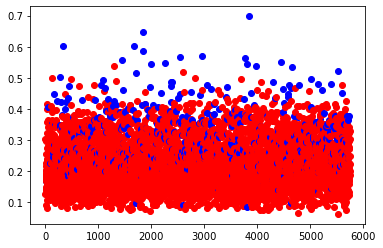

In [23]:
for i in range(len(dice_coefficient)):
    if dice_coefficient[i] in inequal_dice:
        plt.scatter(i,dice_coefficient[i],color='r')
    else:
        plt.scatter(i,dice_coefficient[i],color='b')

In [24]:
# use equal weight in each coefficient
coefficient=[]
for i in range(len(mark)):
    coefficient.append(overlap_coefficient[i]/3+jaccard_coefficient[i]/3+dice_coefficient[i]/3)

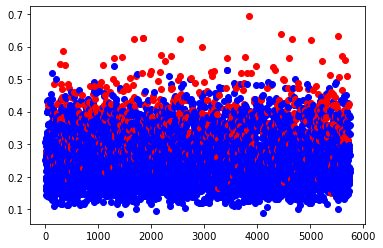

In [25]:
for i in range(len(coefficient)):
    if mark[i]==1:
        plt.scatter(i,coefficient[i],color='r')
    else:
        plt.scatter(i,coefficient[i],color='b')
# same as overlap coefficient

In [66]:
buy_test = pd.read_csv("buy_test.tsv", sep="\t")

In [67]:
buy_test

idx                                          text_left  \
0        0  sony pink cyber-shot 7.2 megapixel digital cam...   
1        1  lg 2.0 cu . ft. over-the-range white microwave...   
2        2  panasonic black 8.5 ' portable dvd player dvdl...   
3        3  sony bravia theater black micro system davis50...   
4        4  panasonic dect 6.0 expandable digital cordless...   
...    ...                                                ...   
1911  1911  nikon coolpix s210 plum 8.1 megapixels compact...   
1912  1912  lg 2.0 cu . ft. over-the-range black microwave...   
1913  1913  lg dlex7177rm cherry red xl capacity electric ...   
1914  1914  sanus 15 ' to 40 ' flat panel black tv wall mo...   
1915  1915  toshiba black portable dvd player sdp71s 7 ' w...   

                                             text_right  label  
0     olympus fe-360 digital camera pink 226540 8 me...      0  
1     maytag 2.0 cu . ft. over-the-range microwave oven      0  
2     toshiba sd-p71s portable dvd player toshiba sd...      0  
3     sony bravia dav-is50 / b home theater system d...      1  
4     panasonic kx-tg9342t cordless phone 1 x phone ...      0  
...                                                 ...    ...  
1911  nikon coolpix s610 digital camera midnight bla...      0  
1912       lg 2.0 cu.ft . over the range microwave oven      1  
1913                        lgs new electric steamdryer      0  
1914  omnimount ultra low profile ulpt-l flat panel ...      0  
1915  toshiba sd-p91s portable dvd player toshiba sd...      0  

[1916 rows x 4 columns]

In [68]:
question1_test=buy_test['text_left']
question2_test=buy_test['text_right']
mark_test=buy_test['label']

In [69]:
#calculate the overlap coefficient
coefficient_test=[]
for i in range(len(question1_test)):
    coefficient_test.append(overlap(question1_test[i],question2_test[i])/3+jaccard(question1_test[i],question2_test[i])/3+dice(question1_test[i],question2_test[i])/3)

In [70]:
    coefficient_test.append(overlap(question1_test[i],question2_test[i])/3+jaccard(question1_test[i],question2_test[i])/3+dice(question1_test[i],question2_test[i])/3)

KeyError: 1916

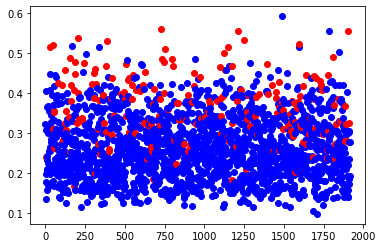

In [65]:
for i in range(len(coefficient_test)):
    if mark_test[i]==1:
        plt.scatter(i,coefficient_test[i],color='r')
    else:
        plt.scatter(i,coefficient_test[i],color='b')

In [71]:
def calculate_is_duplicate(coefficient):
    mark=[]
    for i in range(len(coefficient)):
        if coefficient[i] >= 0.38:
            mark.append(1)
        else:
            mark.append(0)
    return mark

In [72]:
mark_calculate=calculate_is_duplicate(coefficient_test)
mark_calculate

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [73]:
def acc(mark_real,mark_test):
    sum = 0
    for i in range(len(mark_real)):
        if mark_real[i]==mark_test[i]:
            sum=sum+1
        else:
            continue
    return sum/len(mark_test)

In [74]:
acc(mark_test,mark_calculate)

0.8680229525299947